# Scientific Computing 

## Question 1
### Part A

In [ ]:
from CommonModules import *
import ODESolver

In [4]:
def Bruselator(x,t,B,A=1):
    dxdt = A +(x[0]**2)*x[1] -(B+1)*x[0]
    dydt = B*x[0]-(x[0]**2)*x[1]
    return np.array([dxdt,dydt])


<>:10: SyntaxWarning: invalid escape sequence '\i'
<>:10: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Admin\AppData\Local\Temp\ipykernel_8648\1288862887.py:10: SyntaxWarning: invalid escape sequence '\i'
  plt.title(f"Brusselator Time Series \n ICs={InitialConditions},B=3,over T$ \in ${TimeSpan}")


Text(0.5, 1.0, 'Brusselator Time Series \n ICs=[1, 1],B=3,over T$ \\in $[0, 20]')

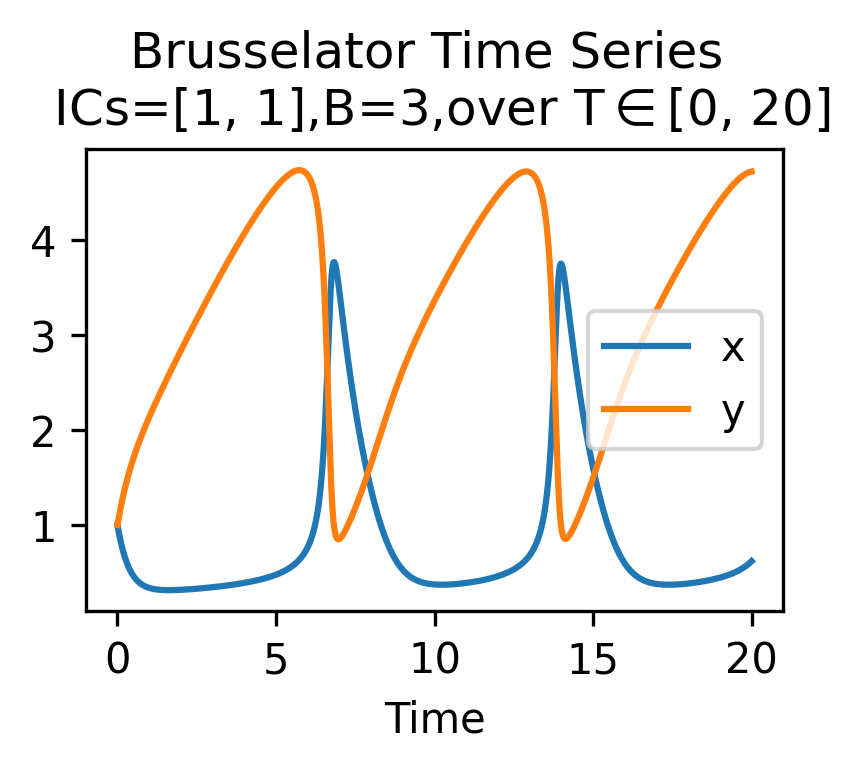

In [11]:
InitialConditions = (1,1)
TimeSpan = (0,20)
XY, Time = ODESolver.Solve_to((lambda x,t: Bruselator(x,t,B=3)),InitialConditions,TimeSpan)
plt.figure(figsize=(3,2),dpi=300)
plt.plot(Time,XY[0,:],label="x")
plt.plot(Time,XY[1,:],label="y")
plt.legend()
plt.xlabel("Time")

plt.title(f"Brusselator Time Series \n ICs={InitialConditions},B=3,over T$ \in ${TimeSpan}")

> Small note: the SyntaxWarning comes from cpython misidentifying latex, the code still runs as expected
As seen from the above graph, the system enters a limit cycle with a period of $\approx6$ with a turning point at $x\approx4$ and $y\approx1$

### Part B

In [ ]:
import Week16General
GuessTimePeriod = 6
GuessICs = (4,1)



